In [3]:
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Preprocessing the E13 dataset


In [6]:
followers = pd.read_csv("E13/followers.csv")
friends = pd.read_csv("E13/friends.csv")
tweets = pd.read_csv("E13/tweets.csv")
users = pd.read_csv("E13/users.csv")

In [7]:
display(followers.shape)
print("*"*50)
display(friends.shape)
print("*"*50)
display(tweets.shape)
print("*"*50)
display(users.shape)
print("*"*50)

(1526944, 2)

**************************************************


(667225, 2)

**************************************************


(2068037, 19)

**************************************************


(1481, 34)

**************************************************


In [8]:
display(followers.info)
print("*"*50)
display(friends.info)
print("*"*50)
display(tweets.info)
print("*"*50)
display(users.info)
print("*"*50)

<bound method DataFrame.info of           source_id  target_id
0                12    3610511
1                12    7046912
2                12    8927532
3                12   13260592
4                12   14709812
...             ...        ...
1526939  1535159720   92403540
1526940  1535177335   92403540
1526941  1535189203   92403540
1526942  1535222438  327900613
1526943  1535255245  917243564

[1526944 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of          source_id   target_id
0          3610511          12
1          3610511          13
2          3610511         380
3          3610511         418
4          3610511         586
...            ...         ...
667220  1219743308   855941888
667221  1219743308   945578083
667222  1219743308   974205294
667223  1219743308  1107595057
667224  1219743308  1178395218

[667225 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of                              created_at                  id  \
0        Tue Mar 26 14:46:37 +0000 2013  316561836378030080   
1        Tue Mar 26 13:00:31 +0000 2013  316535134167912449   
2        Tue Mar 26 09:54:28 +0000 2013  316488311562727424   
3        Tue Mar 26 00:21:19 +0000 2013  316344076775587841   
4        Mon Mar 25 14:46:36 +0000 2013  316199441537327104   
...                                 ...                 ...   
2068032  Mon Feb 25 21:41:52 +0000 2013  306157087241678848   
2068033  Mon Feb 25 21:41:37 +0000 2013  306157022741676032   
2068034  Mon Feb 25 21:04:16 +0000 2013  306147626896736256   
2068035  Mon Feb 25 21:03:10 +0000 2013  306147347283468288   
2068036  Mon Feb 25 21:02:52 +0000 2013  306147273857961984   

                                                      text  \
0        The ScreenWeek h15 Daily is out! http://t.co/y...   
1        Sw Daily Top News: http://t.co/nFV9JppRPl - to...   
2        The Davide Della

**************************************************


<bound method DataFrame.info of               id              name     screen_name  statuses_count  \
0        3610511  Davide Dellacasa          braddd           20370   
1        5656162    Simone Economo           eKoeS            3131   
2        5682702            tacone         tacone_            4024   
3        6067292          alesaura        alesstar           40586   
4        6015122            Angelo      PerDiletto            2016   
...          ...               ...             ...             ...   
1476  1127280169  Frilaif Official         frilaif              49   
1477  1156344000   ♔♥HeartsQueen♥♔    Stronzetta__              66   
1478  1169114810     angelagervasi  angelagervasi2               4   
1479  1212975186          Midnight         Movie1O               3   
1480  1213937306               ʸᵒᵘ  xjawaadscookie            2568   

      followers_count  friends_count  favourites_count  listed_count  \
0                5470           2385               145 

**************************************************


In [9]:
display(followers.isnull().sum())
print("*"*50)
display(friends.isnull().sum())
print("*"*50)
display(tweets.isnull().sum())
print("*"*50)
display(users.isnull().sum())
print("*"*50)

source_id    0
target_id    0
dtype: int64

**************************************************


source_id    0
target_id    0
dtype: int64

**************************************************


created_at                       0
id                               0
text                           486
source                           0
user_id                          0
truncated                  2068037
in_reply_to_status_id            0
in_reply_to_user_id              0
in_reply_to_screen_name    1413405
retweeted_status_id        2068037
geo                        2068037
place                      1964619
retweet_count                    0
reply_count                1855612
favorite_count                   2
num_hashtags                     0
num_urls                         0
num_mentions                     0
timestamp                        0
dtype: int64

**************************************************


id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   1018
lang                                     0
time_zone                              418
location                               492
default_profile                       1084
default_profile_image                 1477
geo_enabled                            762
profile_image_url                        0
profile_banner_url                     496
profile_use_background_image            58
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

**************************************************


### preprocessing the E13 tweets dataframe

In [10]:
# Dropping the coloumn contain the most or complete empty values
tweets.drop(['truncated', 'in_reply_to_screen_name', 'retweeted_status_id', 'geo', 'place', 'reply_count'], axis=1, inplace=True)

# Creating new column from the tweet created date column
tweets.created_at = pd.to_datetime(tweets.created_at)
tweets['tweet_created_year'] = tweets.created_at.dt.year
tweets['tweet_created_month'] = tweets.created_at.dt.month
tweets['tweet_created_day'] = tweets.created_at.dt.day

# Dropping the Date and time column after the new columns
tweets = tweets.drop(['created_at', 'timestamp'], axis=1)

# Preprocessing the source column contains the html tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
tweets.source = tweets.source.apply(remove_html_tags)

# Removing the rows containing the empty values
tweets.dropna(inplace=True)

# Displaying the tweets preprocessed dataset
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_year,tweet_created_month,tweet_created_day
0,316561836378030080,The ScreenWeek h15 Daily is out! http://t.co/y...,Paper.li,3610511,0,0,0,0.0,0,1,2,2013,3,26
1,316535134167912449,Sw Daily Top News: http://t.co/nFV9JppRPl - to...,The Tweeted Times Mobile,3610511,0,0,0,0.0,0,1,0,2013,3,26
2,316488311562727424,The Davide Dellacasa Daily is out! http://t.co...,Paper.li,3610511,0,0,0,0.0,0,1,1,2013,3,26
3,316344076775587841,Sw Top Story: Planes -- Il Teaser Trailer Uffi...,The Tweeted Times Mobile,3610511,0,0,1,0.0,0,2,0,2013,3,26
4,316199441537327104,The ScreenWeek h15 Daily is out! http://t.co/y...,Paper.li,3610511,0,0,0,0.0,0,1,3,2013,3,25


### preprocessing the E13 users dataframe

In [11]:
# Changing the id to user_id
col_list = users.columns.tolist()
col_list[0] = 'user_id'
users.columns = col_list

# Dropping the column that has the most null value
users.drop(users.columns[users.isnull().sum() > 900].tolist(),axis=1,inplace=True)

# Droppint the columns that have only one unique value
users = users[[col for col in users.columns if users[col].nunique() > 1]]

# Applying the data wrangling on the user account creating datetime column
users.created_at = pd.to_datetime(users.created_at)
users['account_creation_day'] = users.created_at.dt.day
users['account_creation_month'] = users.created_at.dt.month
users['account_creation_year'] = users.created_at.dt.year

# Dropping that created date column
users.drop('created_at',axis=1,inplace=True)

# Displaying the users
users.head()

,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,description,account_creation_day,account_creation_month,account_creation_year
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,it,Rome,...,F2E195,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,Founder of http://www.screenweek.it & http://w...,6,4,2007
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,en,Rome,...,FFFFFF,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,BSc degree (cum laude) in Computer Engineering...,30,4,2007
2,5682702,tacone,tacone_,4024,264,87,323,16,en,Rome,...,181A1E,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,Cogito ergo bestemmio.,1,5,2007
3,6067292,alesaura,alesstar,40586,640,622,1118,32,en,Rome,...,FFFFFF,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,"Se la vita ti dà sarde, scapocciale!",15,5,2007
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,it,Rome,...,EEEEEE,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,Je me souviens,13,5,2007


### combining the datasets together

In [12]:
# Combine the users and tweets dataframes
combined = pd.merge(users, tweets, on='user_id')
final_combined = combined[combined.columns[combined.isnull().sum() == 0].tolist()]

# # Combining the friends and followers dataset
# friends.columns = ['user_id', 'friend_id']
# followers.columns = ['user_id', 'follower_id']
# combined1 = pd.merge(friends, followers, on='user_id')
# combined1 = combined1.groupby(['user_id']).count().reset_index()
# combined1.columns = ['user_id', 'friends', 'followers']

# # merging the both dataset into a single dataset
# final_combined = pd.merge(combined, combined1, on="user_id")

# Saving the dataset
final_combined.to_csv("Combined_E13.csv", index=False)

# Preprocessing the FSF Dataset

In [13]:
followers = pd.read_csv("FSF/followers.csv")
friends = pd.read_csv("FSF/friends.csv")
tweets = pd.read_csv("FSF/tweets.csv")
users = pd.read_csv("FSF/users.csv")

display(followers.shape)
print("*"*50)
display(friends.shape)
print("*"*50)
display(tweets.shape)
print("*"*50)
display(users.shape)
print("*"*50)

(11893, 2)

**************************************************


(253026, 2)

**************************************************


(22910, 19)

**************************************************


(1169, 34)

**************************************************


In [14]:
display(followers.info)
print("*"*50)
display(friends.info)
print("*"*50)
display(tweets.info)
print("*"*50)
display(users.info)
print("*"*50)

<bound method DataFrame.info of         source_id   target_id
0        10448322  1174332248
1        14363167  1125890246
2        14363167  1126944366
3        14363167  1127500874
4        14363167  1127587958
...           ...         ...
11888  1398058520  1128822200
11889  1399993855  1174948008
11890  1402944588  1176324859
11891  1403432340  1174885962
11892  1405718462  1174403390

[11893 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of          source_id   target_id
0       1120176186    14355826
1       1120176186    14363167
2       1120176186    15525372
3       1120176186    15652037
4       1120176186    16614663
...            ...         ...
253021  1176427063  1299264860
253022  1176427063  1305703663
253023  1176427063  1321504308
253024  1176427063  1346413699
253025  1176427063  1359184700

[253026 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of                            created_at                  id  \
0      Sun Apr 21 08:56:51 +0000 2013  325895895549870081   
1      Fri Apr 19 13:36:25 +0000 2013  325241478785925120   
2      Tue Apr 16 19:30:25 +0000 2013  324243400968773633   
3      Tue Apr 09 22:01:42 +0000 2013  321744757602779136   
4      Sun Mar 31 21:34:21 +0000 2013  318476384760643584   
...                               ...                 ...   
22905  Mon Feb 25 06:32:44 +0000 2013  305928296674258945   
22906  Sat Feb 23 13:19:22 +0000 2013  305305855090380800   
22907  Thu Feb 21 23:13:11 +0000 2013  304730517385908225   
22908  Wed Feb 20 06:18:04 +0000 2013  304112667977728001   
22909  Fri Feb 15 20:33:35 +0000 2013  302516023171641344   

                                                    text source     user_id  \
0      nanaimokoboany nanaimo authors cashing in on k...    web  1120176186   
1      Revival starts with u, B refreshed in ur faith...    web  1120176186  

**************************************************


<bound method DataFrame.info of               id                name      screen_name  statuses_count  \
0     1120176186      Madonna Carson    MadonnaCarson              22   
1     1124249136       Ardelle Mckee     ArdelleMckee              20   
2     1124264132      Isadora Wilson    IsadoraWilson              19   
3     1124293891     Genesis Merrill   GenesisMerrill              21   
4     1124295318       Kent Caldwell    KentCaldwell3              22   
...          ...                 ...              ...             ...   
1164  1128385638    Anastacia Steele  AnastaciaSteel1              19   
1165  1128865231  Georgette Mitchell  GeorgetteMitc10              20   
1166  1130046366  Julianna Gallagher  JuliannaGallag2              31   
1167  1176159360       Dione Mcelroy  McelroyitbDione              15   
1168  1176392124    Madeline Altizer  AltizerrrbMadel              22   

      followers_count  friends_count  favourites_count  listed_count  \
0                  

**************************************************


In [15]:
display(followers.isnull().sum())
print("*"*50)
display(friends.isnull().sum())
print("*"*50)
display(tweets.isnull().sum())
print("*"*50)
display(users.isnull().sum())
print("*"*50)

source_id    0
target_id    0
dtype: int64

**************************************************


source_id    0
target_id    0
dtype: int64

**************************************************


created_at                     0
id                             0
text                           7
source                         0
user_id                        0
truncated                  22910
in_reply_to_status_id          0
in_reply_to_user_id            0
in_reply_to_screen_name    22910
retweeted_status_id        22910
geo                        22910
place                      22910
retweet_count                  0
reply_count                    0
favorite_count                 0
num_hashtags                   0
num_urls                       0
num_mentions                   0
timestamp                      0
dtype: int64

**************************************************


id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   1169
lang                                     0
time_zone                             1169
location                                20
default_profile                          0
default_profile_image                 1169
geo_enabled                           1169
profile_image_url                        0
profile_banner_url                    1169
profile_use_background_image             0
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

**************************************************


### preprocessing the FSF tweets dataframe

In [16]:
# Dropping the coloumn contain the most or complete empty values
tweets.drop(['truncated', 'in_reply_to_screen_name', 'retweeted_status_id', 'geo', 'place', 'reply_count'], axis=1, inplace=True)

# Creating new column from the tweet created date column
tweets.created_at = pd.to_datetime(tweets.created_at)
tweets['tweet_created_year'] = tweets.created_at.dt.year
tweets['tweet_created_month'] = tweets.created_at.dt.month
tweets['tweet_created_day'] = tweets.created_at.dt.day

# Dropping the Date and time column after the new columns
tweets = tweets.drop(['created_at', 'timestamp'], axis=1)

# Preprocessing the source column contains the html tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
tweets.source = tweets.source.apply(remove_html_tags)

# Removing the rows containing the empty values
tweets.dropna(inplace=True)

# Displaying the tweets preprocessed dataset
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_year,tweet_created_month,tweet_created_day
0,325895895549870081,nanaimokoboany nanaimo authors cashing in on k...,web,1120176186,0,0,0,0,0,0,0,2013,4,21
1,325241478785925120,"Revival starts with u, B refreshed in ur faith...",web,1120176186,0,0,0,0,0,0,0,2013,4,19
2,324243400968773633,ABQ! What are you doing today? Enjoy your Satu...,web,1120176186,0,0,0,0,0,0,0,2013,4,16
3,321744757602779136,"Bye twitter, ill miss you&lt;3 vow of silence ...",web,1120176186,0,0,0,0,0,0,0,2013,4,9
4,318476384760643584,describesmydayMeh. #describesmyday,web,1120176186,0,0,0,0,1,0,0,2013,3,31


### preprocessing the FSF users dataframe

In [17]:
# Changing the id to user_id
col_list = users.columns.tolist()
col_list[0] = 'user_id'
users.columns = col_list

# Dropping the column that has the most null value
users.drop(users.columns[users.isnull().sum() > 900].tolist(),axis=1,inplace=True)

# Droppint the columns that have only one unique value
users = users[[col for col in users.columns if users[col].nunique() > 1]]

# Applying the data wrangling on the user account creating datetime column
users.created_at = pd.to_datetime(users.created_at)
users['account_creation_day'] = users.created_at.dt.day
users['account_creation_month'] = users.created_at.dt.month
users['account_creation_year'] = users.created_at.dt.year

# Dropping that created date column
users.drop('created_at',axis=1,inplace=True)

# Displaying the users
users.head()

,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,location,profile_image_url,profile_background_image_url_https,profile_image_url_https,description,account_creation_day,account_creation_month,account_creation_year
0,1120176186,Madonna Carson,MadonnaCarson,22,11,257,0,"Charlotte, NC",http://a0.twimg.com/profile_images/3287506055/...,https://si0.twimg.com/images/themes/theme1/bg.png,https://si0.twimg.com/profile_images/328750605...,"OK um o a mission to follow at least 1,000 peo...",25,1,2013
1,1124249136,Ardelle Mckee,ArdelleMckee,20,11,226,0,Philippines,http://a0.twimg.com/profile_images/3290829536/...,https://si0.twimg.com/images/themes/theme1/bg.png,https://si0.twimg.com/profile_images/329082953...,NaN,27,1,2013
2,1124264132,Isadora Wilson,IsadoraWilson,19,13,281,0,Atlanta (in the studio),http://a0.twimg.com/profile_images/3306794217/...,https://si0.twimg.com/images/themes/theme1/bg.png,https://si0.twimg.com/profile_images/330679421...,Live your life to the fullest & never have any...,27,1,2013
3,1124293891,Genesis Merrill,GenesisMerrill,21,19,237,0,América,http://a0.twimg.com/profile_images/3295597037/...,https://si0.twimg.com/images/themes/theme1/bg.png,https://si0.twimg.com/profile_images/329559703...,"Hola, no se cambiar mi username. A veces escri...",27,1,2013
4,1124295318,Kent Caldwell,KentCaldwell3,22,20,262,0,ANKARAGÜCÜ,http://a0.twimg.com/profile_images/3306778661/...,https://si0.twimg.com/images/themes/theme1/bg.png,https://si0.twimg.com/profile_images/330677866...,NaN,27,1,2013


In [18]:
# Combine the users and tweets dataframes
combined = pd.merge(users, tweets, on='user_id')
final_combined = combined[combined.columns[combined.isnull().sum() == 0].tolist()]

# Saving the dataset
final_combined.to_csv("Combined_FSF.csv", index=False)

# Preprocessing the INT dataset

In [19]:
followers = pd.read_csv("INT/followers.csv")
friends = pd.read_csv("INT/friends.csv")
tweets = pd.read_csv("INT/tweets.csv")
users = pd.read_csv("INT/users.csv")

display(followers.shape)
print("*"*50)
display(friends.shape)
print("*"*50)
display(tweets.shape)
print("*"*50)
display(users.shape)
print("*"*50)

(23173, 2)

**************************************************


(517485, 2)

**************************************************


(58925, 19)

**************************************************


(1337, 34)

**************************************************


In [20]:
display(followers.info)
print("*"*50)
display(friends.info)
print("*"*50)
display(tweets.info)
print("*"*50)
display(users.info)
print("*"*50)

<bound method DataFrame.info of         source_id  target_id
0         1057211  303932719
1         6250532  616301001
2         8303022  617590863
3         8303022  617678355
4         8303022  618752804
...           ...        ...
23168  1447873602  616853412
23169  1456241312  349392750
23170  1487607870  370098498
23171  1493090119  349392750
23172  1514062141  252647855

[23173 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of          source_id   target_id
0         37384589     8812622
1         37384589     8968042
2         37384589    11013972
3         37384589    14230524
4         37384589    16120554
...            ...         ...
517480  1391998039   617407144
517481  1391998039   980980376
517482  1391998039  1014680358
517483  1391998039  1359182538
517484  1391998039  1393552496

[517485 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of                            created_at                  id  \
0      Sun Apr 21 10:43:18 +0000 2013  325922685232222208   
1      Sun Apr 21 10:43:06 +0000 2013  325922634191749121   
2      Sun Apr 21 10:42:45 +0000 2013  325922549290643456   
3      Sun Apr 21 10:37:14 +0000 2013  325921159751274496   
4      Sun Apr 21 10:37:03 +0000 2013  325921112624074752   
...                               ...                 ...   
58920  Mon May 06 04:33:01 +0000 2013  331265321375780864   
58921  Fri May 17 00:48:14 +0000 2013  335195017457041408   
58922  Fri May 03 13:38:10 +0000 2013  330315349197197315   
58923  Fri May 17 01:08:54 +0000 2013  335200218071052288   
58924  Fri May 03 13:45:09 +0000 2013  330317103737487362   

                                                    text source     user_id  \
0      RT @cmelakigor: OMG! Link to the Twitter King ...    web    37384589   
1      RT @cmelakigor: OMG! Link to the Twitter King ...    web    37384589  

**************************************************


<bound method DataFrame.info of               id                name      screen_name  statuses_count  \
0      370098498        pirfectmoses     pirfectmoses              24   
1       37384589            SAK Nair      bsknair1967             656   
2       72110028              Deepak          dedjven            1234   
3       82885728     Marcos Vinicius        BrowAlves             573   
4      110120789  Shri Kant Kanaujia       kanaujiask             675   
...          ...                 ...              ...             ...   
1332  1391497074         Verda Marks      VerdaMarks1               1   
1333  1391544607     Danial Campbell  DanialCampbell2               0   
1334  1391622127        Maudie Meyer     MaudieMeyer1               2   
1335  1391832212     Harriett Harvey  HarriettHarvey9               2   
1336  1391998039     Gillian Wheeler  GillianWheeler3               0   

      followers_count  friends_count  favourites_count  listed_count  \
0                  

**************************************************


In [21]:
display(followers.isnull().sum())
print("*"*50)
display(friends.isnull().sum())
print("*"*50)
display(tweets.isnull().sum())
print("*"*50)
display(users.isnull().sum())
print("*"*50)

source_id    0
target_id    0
dtype: int64

**************************************************


source_id    0
target_id    0
dtype: int64

**************************************************


created_at                     0
id                             0
text                           7
source                         0
user_id                        0
truncated                  58925
in_reply_to_status_id          0
in_reply_to_user_id            0
in_reply_to_screen_name    58765
retweeted_status_id        58925
geo                        58925
place                      58925
retweet_count                  0
reply_count                    0
favorite_count                 0
num_hashtags                   0
num_urls                       0
num_mentions                   0
timestamp                      0
dtype: int64

**************************************************


id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   1337
lang                                     0
time_zone                             1331
location                                55
default_profile                          6
default_profile_image                 1333
geo_enabled                           1335
profile_image_url                        0
profile_banner_url                    1335
profile_use_background_image             0
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

**************************************************


### preprocessing the INT tweets dataframe


In [22]:
# Dropping the coloumn contain the most or complete empty values
tweets.drop(['truncated', 'in_reply_to_screen_name', 'retweeted_status_id', 'geo', 'place', 'reply_count'], axis=1, inplace=True)

# Creating new column from the tweet created date column
tweets.created_at = pd.to_datetime(tweets.created_at)
tweets['tweet_created_year'] = tweets.created_at.dt.year
tweets['tweet_created_month'] = tweets.created_at.dt.month
tweets['tweet_created_day'] = tweets.created_at.dt.day

# Dropping the Date and time column after the new columns
tweets = tweets.drop(['created_at', 'timestamp'], axis=1)

# Preprocessing the source column contains the html tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
tweets.source = tweets.source.apply(remove_html_tags)

# Removing the rows containing the empty values
tweets.dropna(inplace=True)

# Displaying the tweets preprocessed dataset
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_year,tweet_created_month,tweet_created_day
0,325922685232222208,RT @cmelakigor: OMG! Link to the Twitter King ...,web,37384589,0,0,1685,1256,0,1,2,2013,4,21
1,325922634191749121,RT @cmelakigor: OMG! Link to the Twitter King ...,web,37384589,0,0,1710,1277,0,1,2,2013,4,21
2,325922549290643456,RT @cmelakigor: aMAP.to - Great way to persona...,web,37384589,0,0,2746,1953,0,0,1,2013,4,21
3,325921159751274496,RT @today_neta_bot: ○の部分はすべて白色なんだけど、チカチカ黒い●が見え...,web,37384589,0,0,4819,3049,0,1,1,2013,4,21
4,325921112624074752,RT @AllenrTanner: E Cig Starter Kit - http://t...,web,37384589,0,0,4829,3051,0,1,1,2013,4,21


### preprocessing the INT users dataframe

In [23]:
# Changing the id to user_id
col_list = users.columns.tolist()
col_list[0] = 'user_id'
users.columns = col_list

# Dropping the column that has the most null value
users.drop(users.columns[users.isnull().sum() > 900].tolist(),axis=1,inplace=True)

# Droppint the columns that have only one unique value
users = users[[col for col in users.columns if users[col].nunique() > 1]]

# Applying the data wrangling on the user account creating datetime column
users.created_at = pd.to_datetime(users.created_at)
users['account_creation_day'] = users.created_at.dt.day
users['account_creation_month'] = users.created_at.dt.month
users['account_creation_year'] = users.created_at.dt.year

# Dropping that created date column
users.drop('created_at',axis=1,inplace=True)

# Displaying the users
users.head()

,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,location,...,profile_image_url_https,profile_sidebar_border_color,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,description,account_creation_day,account_creation_month,account_creation_year
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,en,NaN,...,https://twimg0-a.akamaihd.net/profile_images/3...,FFFFFF,DDEEF6,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,8,9,2011
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,en,Kuwait,...,https://si0.twimg.com/profile_images/164232553...,C0DEED,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,in Kuwait with my buetiful family.,3,5,2009
2,72110028,Deepak,dedjven,1234,15,104,1150,0,en,India,...,https://si0.twimg.com/profile_images/114311484...,EEEEEE,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,NaN,6,9,2009
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,en,Rio de Janeiro,...,https://si0.twimg.com/profile_images/263073693...,C0DEED,DDEEF6,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,16,10,2009
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,en,lucknow,...,https://si0.twimg.com/sticky/default_profile_i...,C0DEED,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,31,1,2010


In [24]:
# Combine the users and tweets dataframes
combined = pd.merge(users, tweets, on='user_id')
final_combined = combined[combined.columns[combined.isnull().sum() == 0].tolist()]

# # Combining the friends and followers dataset
# friends.columns = ['user_id', 'friend_id']
# followers.columns = ['user_id', 'follower_id']
# combined1 = pd.merge(friends, followers, on='user_id')
# combined1 = combined1.groupby(['user_id']).count().reset_index()
# combined1.columns = ['user_id', 'friends', 'followers']

# # merging the both dataset into a single dataset
# final_combined = pd.merge(combined, combined1, on="user_id")

# Saving the dataset
final_combined.to_csv("Combined_INT.csv", index=False)

# Preprocessing the TFP dataset

In [25]:
followers = pd.read_csv("TFP/followers.csv")
friends = pd.read_csv("TFP/friends.csv")
tweets = pd.read_csv("TFP/tweets.csv")
users = pd.read_csv("TFP/users.csv")

display(followers.shape)
print("*"*50)
display(friends.shape)
print("*"*50)
display(tweets.shape)
print("*"*50)
display(users.shape)
print("*"*50)

(258494, 2)

**************************************************


(241710, 2)

**************************************************


(563693, 19)

**************************************************


(469, 34)

**************************************************


In [26]:
display(followers.info)
print("*"*50)
display(friends.info)
print("*"*50)
display(tweets.info)
print("*"*50)
display(users.info)
print("*"*50)

<bound method DataFrame.info of          source_id  target_id
0               20      24503
1               34      24503
2              107      24503
3              246   19861856
4              259   19861856
...            ...        ...
258489  1534437206  157042531
258490  1534609699  479815906
258491  1534750358    8029522
258492  1534974415   22598920
258493  1535108269   91866630

[258494 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of          source_id  target_id
0            22903      21143
1            22903      21843
2            22903      42683
3            22903      55573
4            22903     380913
...            ...        ...
241705  1147652996   85639608
241706  1147652996  133790890
241707  1147652996  180505807
241708  1147652996  184910040
241709  1147652996  987007950

[241710 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of                             created_at                  id  \
0       Fri Dec 21 14:02:36 +0000 2012  282123910303080448   
1       Wed Dec 05 05:59:43 +0000 2012  276204184393641984   
2       Wed Dec 05 05:55:01 +0000 2012  276203000333217792   
3       Thu Sep 20 15:25:38 +0000 2012  248805120802959362   
4       Sat Sep 08 14:28:10 +0000 2012  244442004661096448   
...                                ...                 ...   
563688  Wed Feb 13 11:14:31 +0000 2013  301650553560236032   
563689  Wed Feb 13 11:11:45 +0000 2013  301649859755253760   
563690  Tue Feb 12 14:25:22 +0000 2013  301336196020305920   
563691  Mon Feb 11 07:46:44 +0000 2013  300873489357885440   
563692  Fri Feb 08 19:50:38 +0000 2013  299968502452867073   

                                                     text  \
0       @TheFakeProject cerca followers reali!!! #ImNo...   
1       RT @laperniconi: Cosa ci metteremo quest'anno ...   
2       RT @wontcallyouback: #faiunadoma

**************************************************


<bound method DataFrame.info of              id                name   screen_name  statuses_count  \
0         24503  Roberto Bonanzinga    Bonanzinga            4340   
1         22903             effeffe       effeffe             164   
2        382393        Ciro Cattuto          ciro            1070   
3        286543   Alessio Bragadini       abragad            6892   
4        438023        fullcaffeine  fullcaffeine            2885   
..          ...                 ...           ...             ...   
464  1010894497        Holyfocaccia  holyfocaccia             230   
465    39588706       carla bonvino        sotila               5   
466    13972932     Robert McMillan   bobmcmillan            6036   
467    90626911      Montse Cuadros      MontseCo             160   
468   321257315   Falko von KÃ¼ster      Falko_vK              17   

     followers_count  friends_count  favourites_count  listed_count  \
0               5055           1466               267           256 

**************************************************


In [27]:
display(followers.isnull().sum())
print("*"*50)
display(friends.isnull().sum())
print("*"*50)
display(tweets.isnull().sum())
print("*"*50)
display(users.isnull().sum())
print("*"*50)

source_id    0
target_id    0
dtype: int64

**************************************************


source_id    0
target_id    0
dtype: int64

**************************************************


created_at                      0
id                              0
text                            0
source                          0
user_id                         0
truncated                  563693
in_reply_to_status_id           0
in_reply_to_user_id             0
in_reply_to_screen_name    413873
retweeted_status_id        563693
geo                        563693
place                      533359
retweet_count                   0
reply_count                429974
favorite_count             426019
num_hashtags                    0
num_urls                        0
num_mentions                    0
timestamp                       0
dtype: int64

**************************************************


id                                      0
name                                    0
screen_name                             0
statuses_count                          0
followers_count                         0
friends_count                           0
favourites_count                        0
listed_count                            0
created_at                              0
url                                   235
lang                                    0
time_zone                             101
location                              145
default_profile                       314
default_profile_image                 454
geo_enabled                           230
profile_image_url                       0
profile_banner_url                    249
profile_use_background_image           26
profile_background_image_url_https      0
profile_text_color                      0
profile_image_url_https                 0
profile_sidebar_border_color            0
profile_background_tile           

**************************************************


### Preprocessing the TFP tweets dataframe

In [28]:
# Dropping the coloumn contain the most or complete empty values
tweets.drop(['truncated', 'in_reply_to_screen_name', 'retweeted_status_id', 'geo', 'place', 'reply_count'], axis=1, inplace=True)

# Creating new column from the tweet created date column
tweets.created_at = pd.to_datetime(tweets.created_at)
tweets['tweet_created_year'] = tweets.created_at.dt.year
tweets['tweet_created_month'] = tweets.created_at.dt.month
tweets['tweet_created_day'] = tweets.created_at.dt.day

# Dropping the Date and time column after the new columns
tweets = tweets.drop(['created_at', 'timestamp'], axis=1)

# Preprocessing the source column contains the html tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
tweets.source = tweets.source.apply(remove_html_tags)

# Removing the rows containing the empty values
tweets.dropna(inplace=True)

# Displaying the tweets preprocessed dataset
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_year,tweet_created_month,tweet_created_day
0,282123910303080448,@TheFakeProject cerca followers reali!!! #ImNo...,web,22903,0,987007950,0,0.0,1,1,1,2012,12,21
1,276204184393641984,RT @laperniconi: Cosa ci metteremo quest'anno ...,Twitter for iPad,22903,0,0,18,0.0,1,0,3,2012,12,5
2,276203000333217792,RT @wontcallyouback: #faiunadomandaalpapa ha m...,Twitter for iPad,22903,0,0,686,0.0,1,0,1,2012,12,5
3,248805120802959362,RT @nausea_17: I tifosi del Napoli si picchian...,web,22903,0,0,1,0.0,0,0,1,2012,9,20
4,244442004661096448,@ioeilmiopc buonanotte a te che mi apri un mon...,Twitter for iPad,22903,244441040575143936,11154952,0,1.0,0,0,1,2012,9,8


### Preprocessing The TFP users dataset

In [29]:
# Changing the id to user_id
col_list = users.columns.tolist()
col_list[0] = 'user_id'
users.columns = col_list

# Dropping the column that has the most null value
users.drop(users.columns[users.isnull().sum() > 900].tolist(),axis=1,inplace=True)

# Droppint the columns that have only one unique value
users = users[[col for col in users.columns if users[col].nunique() > 1]]

# Applying the data wrangling on the user account creating datetime column
users.created_at = pd.to_datetime(users.created_at)
users['account_creation_day'] = users.created_at.dt.day
users['account_creation_month'] = users.created_at.dt.month
users['account_creation_year'] = users.created_at.dt.year

# Dropping that created date column
users.drop('created_at',axis=1,inplace=True)

# Displaying the users
users.head()

,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,description,account_creation_day,account_creation_month,account_creation_year
0,24503,Roberto Bonanzinga,Bonanzinga,4340,5055,1466,267,256,http://t.co/32VHs0bxbY,en,...,829D5E,99CC33,http://a0.twimg.com/profile_background_images/...,352726,D02B55,-28800.0,Partner at Balderton Capital (formerly Benchma...,27,11,2006
1,22903,effeffe,effeffe,164,132,194,12,4,http://t.co/CX7EHdk9DJ,it,...,EEEEEE,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,3600.0,L'uomo ha creato dio a sua immagine e somiglia...,26,11,2006
2,382393,Ciro Cattuto,ciro,1070,1154,832,871,92,http://t.co/26dNjSYe5Q,en,...,C6E2EE,DAECF4,http://a0.twimg.com/images/themes/theme2/bg.gif,C6E2EE,1F98C7,3600.0,Research Director at ISI Foundation. Data scie...,31,12,2006
3,286543,Alessio Bragadini,abragad,6892,930,535,478,28,http://t.co/xoOdZi9jic,en,...,87BC44,E0FF92,http://a0.twimg.com/profile_background_images/...,9AE4E8,0000FF,3600.0,Web and social media developer from Italy,27,12,2006
4,438023,fullcaffeine,fullcaffeine,2885,173,444,41,2,http://www.fullcaffeine.com,it,...,EEEEEE,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,3600.0,NaN,2,1,2007


In [30]:
# Combine the users and tweets dataframes
combined = pd.merge(users, tweets, on='user_id')
final_combined = combined[combined.columns[combined.isnull().sum() == 0].tolist()]

# # Combining the friends and followers dataset
# friends.columns = ['user_id', 'friend_id']
# followers.columns = ['user_id', 'follower_id']
# combined1 = pd.merge(friends, followers, on='user_id')
# combined1 = combined1.groupby(['user_id']).count().reset_index()
# combined1.columns = ['user_id', 'friends', 'followers']

# # merging the both dataset into a single dataset
# final_combined = pd.merge(combined, combined1, on="user_id")

# Saving the dataset
final_combined.to_csv("Combined_TFP.csv", index=False)

# Preprocessing the TWT dataset

In [31]:
followers = pd.read_csv("TWT/followers.csv")
friends = pd.read_csv("TWT/friends.csv")
tweets = pd.read_csv("TWT/tweets.csv")
users = pd.read_csv("TWT/users.csv")

display(followers.shape)
print("*"*50)
display(friends.shape)
print("*"*50)
display(tweets.shape)
print("*"*50)
display(users.shape)
print("*"*50)

(28588, 2)

**************************************************


(729839, 2)

**************************************************


(114192, 19)

**************************************************


(845, 34)

**************************************************


In [32]:
display(followers.info)
print("*"*50)
display(friends.info)
print("*"*50)
display(tweets.info)
print("*"*50)
display(users.info)
print("*"*50)

<bound method DataFrame.info of         source_id  target_id
0             586   17656600
1            1075   17656600
2            2781   17656600
3            6095   17656600
4           11552   17656600
...           ...        ...
28583  1534426106   48638750
28584  1534777951  140176665
28585  1535234126  110875970
28586  1535254554  253111142
28587  1535314574  202886194

[28588 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of          source_id   target_id
0         10935572       15913
1         10935572       70103
2         10935572      788524
3         10935572      788670
4         10935572     1097161
...            ...         ...
729834  1281271908  1365332263
729835  1281271908  1369706180
729836  1281271908  1370761669
729837  1281271908  1387282434
729838  1281271908  1390540513

[729839 rows x 2 columns]>

**************************************************


<bound method DataFrame.info of                             created_at                  id  \
0       Sat Apr 20 13:19:19 +0000 2013  325599560959393793   
1       Tue Apr 16 19:31:39 +0000 2013  324243711443730434   
2       Tue Apr 16 17:38:06 +0000 2013  324215137055670274   
3       Sun Apr 14 15:33:00 +0000 2013  323458877003792386   
4       Fri Apr 12 15:37:59 +0000 2013  322735354148945920   
...                                ...                 ...   
114187  Thu Apr 25 13:54:23 +0000 2013  327420326055124993   
114188  Thu Apr 25 13:50:01 +0000 2013  327419227843735555   
114189  Wed Apr 24 20:02:26 +0000 2013  327150562271440897   
114190  Sat Apr 27 20:34:55 +0000 2013  328245898066919424   
114191  Sat Apr 27 20:33:13 +0000 2013  328245471401345025   

                                                     text  \
0       https://t.co/iocNIgHxXH. @LovesOfaLDNgirl  her...   
1        Well done hubby @Allan_76 http://t.co/AaeTwLucUG   
2       Two years with my lovely husband

**************************************************


<bound method DataFrame.info of              id                  name    screen_name  statuses_count  \
0      80479674               YI YUAN      yi_twitts              29   
1      82487179        Marcos Perez C    marcos_peca            1408   
2     105830531         curti lorenzo   curtilorenzo              39   
3     114488344  ruben dario toscano      gatito2710              59   
4     123222267          Malek Khalaf    MalekKhalaf             987   
..          ...                   ...            ...             ...   
840  1098285654                    K.        k_ksaid               1   
841  1122936860                Nick.J   Nick_DoubleJ               6   
842  1129397028                carine  tweetyseventy               1   
843  1151673038                Dennez  FlorianDennez               5   
844  1281271908  I Respect the queen!     SearsTammy             207   

     followers_count  friends_count  favourites_count  listed_count  \
0                 19            

**************************************************


In [33]:
display(followers.isnull().sum())
print("*"*50)
display(friends.isnull().sum())
print("*"*50)
display(tweets.isnull().sum())
print("*"*50)
display(users.isnull().sum())
print("*"*50)

source_id    0
target_id    0
dtype: int64

**************************************************


source_id    0
target_id    0
dtype: int64

**************************************************


created_at                      0
id                              0
text                            6
source                          0
user_id                         0
truncated                  114192
in_reply_to_status_id           0
in_reply_to_user_id             0
in_reply_to_screen_name     87193
retweeted_status_id        114192
geo                        114192
place                      112509
retweet_count                   0
reply_count                     0
favorite_count                  0
num_hashtags                    0
num_urls                        0
num_mentions                    0
timestamp                       0
dtype: int64

**************************************************


id                                      0
name                                    0
screen_name                             0
statuses_count                          0
followers_count                         0
friends_count                           0
favourites_count                        0
listed_count                            0
created_at                              0
url                                   744
lang                                    0
time_zone                             516
location                              500
default_profile                       311
default_profile_image                 843
geo_enabled                           708
profile_image_url                       0
profile_banner_url                    780
profile_use_background_image            9
profile_background_image_url_https      0
profile_text_color                      0
profile_image_url_https                 0
profile_sidebar_border_color            0
profile_background_tile           

**************************************************


### Preprocessing the TWT tweets dataframe


In [34]:
# Dropping the coloumn contain the most or complete empty values
tweets.drop(['truncated', 'in_reply_to_screen_name', 'retweeted_status_id', 'geo', 'place', 'reply_count'], axis=1, inplace=True)

# Creating new column from the tweet created date column
tweets.created_at = pd.to_datetime(tweets.created_at)
tweets['tweet_created_year'] = tweets.created_at.dt.year
tweets['tweet_created_month'] = tweets.created_at.dt.month
tweets['tweet_created_day'] = tweets.created_at.dt.day

# Dropping the Date and time column after the new columns
tweets = tweets.drop(['created_at', 'timestamp'], axis=1)

# Preprocessing the source column contains the html tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
tweets.source = tweets.source.apply(remove_html_tags)

# Removing the rows containing the empty values
tweets.dropna(inplace=True)

# Displaying the tweets preprocessed dataset
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_year,tweet_created_month,tweet_created_day
0,325599560959393793,https://t.co/iocNIgHxXH. @LovesOfaLDNgirl her...,Twitter for iPhone,10935572,0,0,0,0,0,1,1,2013,4,20
1,324243711443730434,Well done hubby @Allan_76 http://t.co/AaeTwLucUG,Instagram,10935572,0,0,0,0,0,1,1,2013,4,16
2,324215137055670274,Two years with my lovely husband - thank you f...,Instagram,10935572,0,0,0,0,0,1,1,2013,4,16
3,323458877003792386,Sorry bunny about your ears but I was hungry.....,Instagram,10935572,0,0,0,0,0,1,0,2013,4,14
4,322735354148945920,"Small man, big drink @Allan_76 http://t.co/4NU...",Instagram,10935572,0,0,0,0,0,1,1,2013,4,12


### Preprocessing the TWT users dataframe

In [35]:
# Changing the id to user_id
col_list = users.columns.tolist()
col_list[0] = 'user_id'
users.columns = col_list

# Dropping the column that has the most null value
users.drop(users.columns[users.isnull().sum() > 900].tolist(),axis=1,inplace=True)

# Droppint the columns that have only one unique value
users = users[[col for col in users.columns if users[col].nunique() > 1]]

# Applying the data wrangling on the user account creating datetime column
users.created_at = pd.to_datetime(users.created_at)
users['account_creation_day'] = users.created_at.dt.day
users['account_creation_month'] = users.created_at.dt.month
users['account_creation_year'] = users.created_at.dt.year

# Dropping that created date column
users.drop('created_at',axis=1,inplace=True)

# Displaying the users
users.head()

,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,description,account_creation_day,account_creation_month,account_creation_year
0,80479674,YI YUAN,yi_twitts,29,19,255,1,0,http://www.jycondo.com,en,...,eeeeee,efefef,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-18000.0,real estate sales,7,10,2009
1,82487179,Marcos Perez C,marcos_peca,1408,208,866,138,0,NaN,es,...,86A4A6,A0C5C7,http://a0.twimg.com/images/themes/theme6/bg.gif,709397,FF3300,-21600.0,NaN,14,10,2009
2,105830531,curti lorenzo,curtilorenzo,39,59,962,8,0,http://www.valcavargna.com/,it,...,A8C7F7,C0DFEC,http://a0.twimg.com/profile_background_images/...,022330,0084B4,0.0,le corna del capro scappato dal gregge s'infil...,17,1,2010
3,114488344,ruben dario toscano,gatito2710,59,7,49,4,0,NaN,es,...,C0DEED,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,-18000.0,NaN,15,2,2010
4,123222267,Malek Khalaf,MalekKhalaf,987,60,521,61,1,http://www.facebook.com/Malek.AlBalawi,en,...,000002,A9A09B,http://a0.twimg.com/profile_background_images/...,D9FBFC,C0C3CC,10800.0,"MA student at JU, Interested in Juventus,Italy...",15,3,2010


In [36]:
# Combine the users and tweets dataframes
combined = pd.merge(users, tweets, on='user_id')
final_combined = combined[combined.columns[combined.isnull().sum() == 0].tolist()]

# Saving the dataset
final_combined.to_csv("Combined_TWT.csv", index=False)

# Combining All datasets into a single dataset

In [37]:
E13 = pd.read_csv("Combined_E13.csv")
FSF = pd.read_csv("Combined_FSF.csv")
INT = pd.read_csv("Combined_INT.csv")
TFP = pd.read_csv("Combined_TFP.csv")
TWT = pd.read_csv("Combined_TWT.csv")

In [38]:
#E13 = E13.sample(10000)
#FSF  = FSF.sample(10000)
#INT = INT.sample(10000)
#TFP = TFP.sample(10000)
#TWT = TWT.sample(10000)

In [39]:
E13['Label'] = ["Human" for i in range(E13.shape[0])]
FSF['Label'] = ["Fake" for i in range(FSF.shape[0])]
INT['Label'] = ["Fake" for i in range(INT.shape[0])]
TFP['Label'] = ["Human" for i in range(TFP.shape[0])]
TWT['Label'] = ["Fake" for i in range(TWT.shape[0])]

In [40]:
df = pd.concat([E13, FSF, INT, TFP, TWT])
print("Complete dataset shape: ", df.shape)

Complete dataset shape:  (2401230, 35)


In [41]:
# Dropping the rows containing the null values
df.dropna(inplace=True)

In [42]:
# Define the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

In [43]:
import nltk

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
# Apply the preprocessing function to the text column
df['text'] = df['text'].apply(preprocess_text)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a bag-of-words representation
vectorizer = CountVectorizer(max_features=100)
vectorized = vectorizer.fit_transform(df['text'])

In [47]:
vectorized_data = np.array(vectorized.toarray())

In [48]:
vectorized_df = pd.DataFrame(vectorized_data, columns=vectorizer.get_feature_names())

In [49]:
vectorized_df = vectorized_df.reset_index()

In [50]:
# vectorized_df.shape
df = df.reset_index()

In [51]:
com_df = pd.concat([vectorized_df, df], axis=1)

In [52]:
com_df.head()

,index,ad,ai,al,all,alla,anch,ancora,anni,bene,...,in_reply_to_user_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_year,tweet_created_month,tweet_created_day,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,1,2,2013,3,26,Human
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,1,0,2013,3,26,Human
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,1,1,2013,3,26,Human
3,3,0,0,0,0,0,0,0,0,0,...,0,1,0.0,0,2,0,2013,3,26,Human
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,1,3,2013,3,25,Human


In [53]:
com_df.drop('index', axis=1, inplace=True)

In [54]:
from sklearn.preprocessing import LabelEncoder

# Label encoding the column containing the string type data
str_type_col = [col for col in com_df.columns if com_df[col].dtype == object]

le_dic = {}
for col in str_type_col:
    print(col)
    le = LabelEncoder()
    com_df[col] = le.fit_transform(com_df[col].astype(str))
    le_dic[col] = le

name
screen_name
lang
profile_image_url
profile_background_image_url_https
profile_text_color
profile_image_url_https
profile_sidebar_border_color
profile_sidebar_fill_color
profile_background_image_url
profile_background_color
profile_link_color
text
source
Label


In [55]:
df.nunique()

index                                 2067549
user_id                                  3989
name                                     3971
screen_name                              3989
statuses_count                           1530
followers_count                           639
friends_count                            1022
favourites_count                          533
listed_count                               90
lang                                       15
profile_image_url                        3972
profile_background_image_url_https       1103
profile_text_color                        267
profile_image_url_https                  3977
profile_sidebar_border_color              184
profile_sidebar_fill_color                266
profile_background_image_url             1089
profile_background_color                  376
profile_link_color                        511
account_creation_day                       31
account_creation_month                     12
account_creation_year             

In [56]:
from sklearn.model_selection import train_test_split

# Extract the target and feature columns
X = com_df.iloc[:,:-1]
y = com_df.iloc[:, -1]

# Spliting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Displaying the train and test data shape
print("Train data:", X_train.shape)
print("Test data:", X_test.shape)

Train data: (1593479, 134)
Test data: (784848, 134)


In [57]:
# Models Importing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# For Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [58]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== Decision tree ==========

Accuracy on validation set: 0.9999

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    102557
           1       1.00      1.00      1.00    682291

    accuracy                           1.00    784848
   macro avg       1.00      1.00      1.00    784848
weighted avg       1.00      1.00      1.00    784848


Confusion Matrix : 
 [[102523     34]
 [    21 682270]]


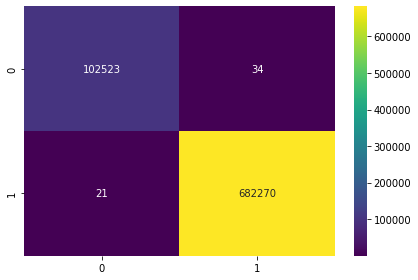

========== Random Forest ==========

Accuracy on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    102557
           1       1.00      1.00      1.00    682291

    accuracy                           1.00    784848
   macro avg       1.00      1.00      1.00    784848
weighted avg       1.00      1.00      1.00    784848


Confusion Matrix : 
 [[102555      2]
 [     1 682290]]


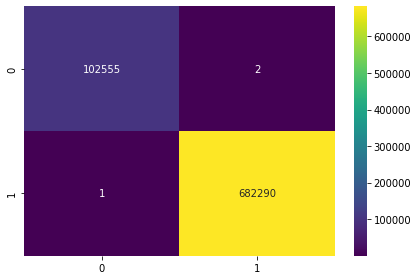

========== Naive Bayes ==========

Accuracy on validation set: 0.3522

Classification report : 
               precision    recall  f1-score   support

           0       0.15      0.83      0.25    102557
           1       0.92      0.28      0.43    682291

    accuracy                           0.35    784848
   macro avg       0.53      0.55      0.34    784848
weighted avg       0.82      0.35      0.41    784848


Confusion Matrix : 
 [[ 85065  17492]
 [490951 191340]]


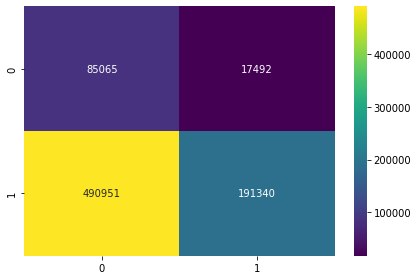

========== Logistic Regression ==========

Accuracy on validation set: 0.1307

Classification report : 
               precision    recall  f1-score   support

           0       0.13      1.00      0.23    102557
           1       0.00      0.00      0.00    682291

    accuracy                           0.13    784848
   macro avg       0.07      0.50      0.12    784848
weighted avg       0.02      0.13      0.03    784848


Confusion Matrix : 
 [[102557      0]
 [682291      0]]


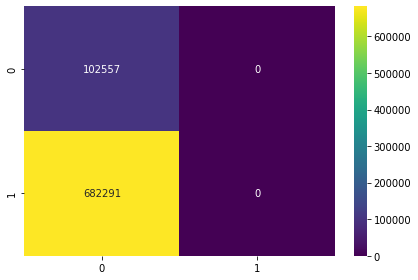

In [59]:
# For Decision tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# For Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
pred_nb = nb_model.predict(X_test)
results_nb = modelEvaluation(pred_nb, y_test, 'Naive Bayes')

# For Logistic Regression Classifier
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# Hyperparameter tuning

In [60]:
# Defining Hyperparameters grid
rfc_param = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10]}

mnb_param = {'alpha': [0.1, 0.5, 1.0, 2.0]}

lg_param = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet']}

dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [61]:
# Initializing grid search CV to find the best parameters for each model.
rfc_grid_search = GridSearchCV(estimator=rf_model, param_grid=rfc_param, cv=5)
nb_grid_search = GridSearchCV(estimator=nb_model, param_grid= mnb_param, cv=5)
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lg_param, cv=5)
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param, cv=5)

In [62]:
# Searching for Best Parameters
rfc_grid_search.fit(X, y)
dt_grid_search.fit(X, y)
nb_grid_search.fit(X, y)
lr_grid_search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
rfc_best_params = rfc_grid_search.best_params_
nb_best_params = nb_grid_search.best_params_
lr_best_params = lr_grid_search.best_params_
dt_best_params = dt_grid_search.best_params_
print('Best Parameters for Random Forest', rfc_best_params, end = '\n-------------------------------\n')
print('Best Parameters for Naive Bayes', nb_best_params, end = '\n-------------------------------\n')
print('Best Parameters for Logistic Regression', lr_best_params, end = '\n-------------------------------\n')
print('Best Parameters for Decision Tree', dt_best_params, end = '\n-------------------------------\n')

Best Parameters for Random Forest {'max_depth': 5, 'n_estimators': 500}
-------------------------------
Best Parameters for Naive Bayes {'alpha': 0.1}
-------------------------------
Best Parameters for Logistic Regression {'C': 0.001, 'penalty': 'l2'}
-------------------------------
Best Parameters for Decision Tree {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
-------------------------------


# Training with Best Parameters

========== Decision tree ==========

Accuracy on validation set: 0.9451

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.59      0.74    102557
           1       0.94      1.00      0.97    682291

    accuracy                           0.95    784848
   macro avg       0.96      0.79      0.85    784848
weighted avg       0.95      0.95      0.94    784848


Confusion Matrix : 
 [[ 60540  42017]
 [  1078 681213]]


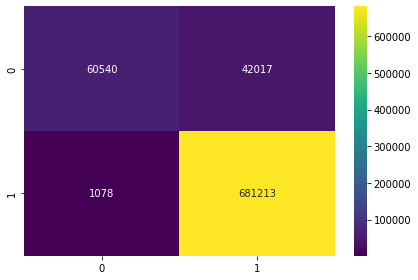

========== Random Forest ==========

Accuracy on validation set: 0.9089

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.30      0.46    102557
           1       0.91      1.00      0.95    682291

    accuracy                           0.91    784848
   macro avg       0.95      0.65      0.71    784848
weighted avg       0.92      0.91      0.89    784848


Confusion Matrix : 
 [[ 31061  71496]
 [    26 682265]]


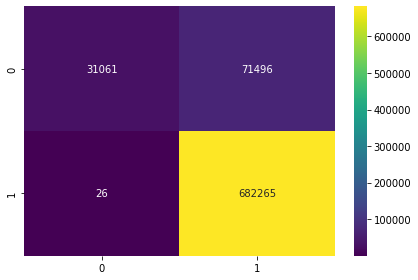

========== Naive Bayes ==========

Accuracy on validation set: 0.3522

Classification report : 
               precision    recall  f1-score   support

           0       0.15      0.83      0.25    102557
           1       0.92      0.28      0.43    682291

    accuracy                           0.35    784848
   macro avg       0.53      0.55      0.34    784848
weighted avg       0.82      0.35      0.41    784848


Confusion Matrix : 
 [[ 85065  17492]
 [490951 191340]]


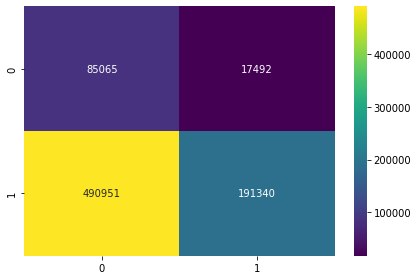

========== Logistic Regression ==========

Accuracy on validation set: 0.1307

Classification report : 
               precision    recall  f1-score   support

           0       0.13      1.00      0.23    102557
           1       0.00      0.00      0.00    682291

    accuracy                           0.13    784848
   macro avg       0.07      0.50      0.12    784848
weighted avg       0.02      0.13      0.03    784848


Confusion Matrix : 
 [[102557      0]
 [682291      0]]


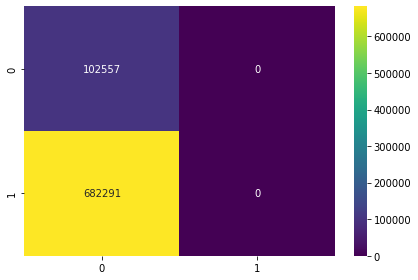

In [64]:
# For Decision tree Classifier
dt_model = DecisionTreeClassifier(**dt_best_params)
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_dt2 = modelEvaluation(pred_dt, y_test, 'Decision tree')

# For Random Forest Classifier
rf_model = RandomForestClassifier(**rfc_best_params)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_rf2 = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Naive Bayes Classifier
nb_model = MultinomialNB(**nb_best_params)
nb_model.fit(X_train,y_train)
pred_nb = nb_model.predict(X_test)
results_nb2 = modelEvaluation(pred_nb, y_test, 'Naive Bayes')

# For Logistic Regression Classifier
lr_model = LogisticRegression(**lr_best_params)
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_lr2 = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

In [65]:
comparison = {'Models': ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression'],
             'Accuracy B/T': [result_dt[0], result_rf[0], results_nb[0], results_lr[0]],
             'Accuracy A/T': [result_dt2[0], result_rf2[0], results_nb2[0], results_lr2[0]],
              'Percision B/T': [result_dt[1], result_rf[1], results_nb[1], results_lr[1]],
             'Percision A/T': [result_dt2[1], result_rf2[1], results_nb2[1], results_lr2[1]],
             'Recall B/T': [result_dt[2], result_rf[2], results_nb[2], results_lr[2]],
             'Recall A/T': [result_dt2[2], result_rf2[2], results_nb2[2], results_lr2[2]],
             'F1-score B/T': [result_dt[3], result_rf[3], results_nb[3], results_lr[3]],
             'F1-score A/T': [result_dt2[3], result_rf2[3], results_nb2[3], results_lr2[3]]}
df_acc = pd.DataFrame(comparison)
df_acc

,Models,Accuracy B/T,Accuracy A/T,Percision B/T,Percision A/T,Recall B/T,Recall A/T,F1-score B/T,F1-score A/T
0,Decision Tree,0.999930,0.945091,0.999873,0.962204,0.999819,0.794363,0.999846,0.853422
1,Random Forest,0.999996,0.908872,0.999994,0.952156,0.999990,0.651414,0.999992,0.707514
2,Naive Bayes,0.352176,0.352176,0.531959,0.531959,0.554939,0.554939,0.340076,0.340076
3,Logistic Regression,0.130671,0.130671,0.065336,0.065336,0.500000,0.500000,0.115570,0.115570


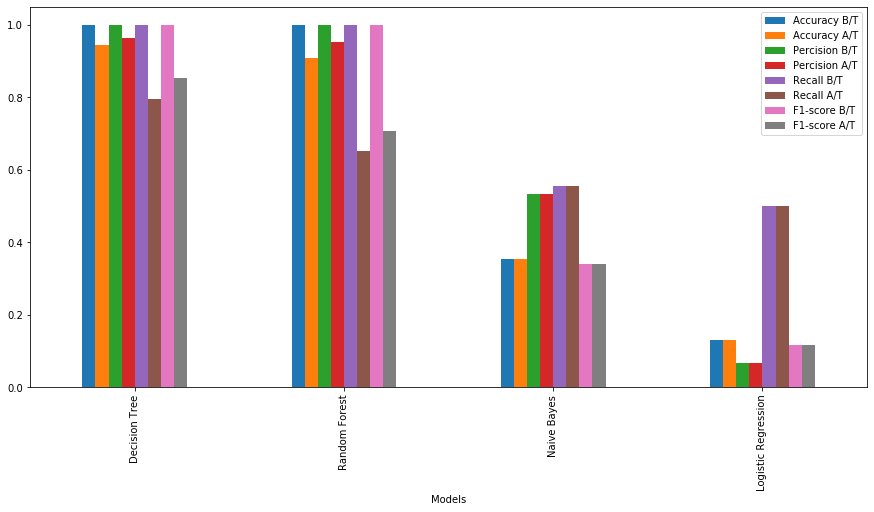

In [66]:
df_acc.set_index("Models").plot(kind='bar', figsize=(15,7))

In [ ]:
from sklearn.svm import SVC

# Create the SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
pred_svm = svm_model.predict(X_test)

# Evaluate the model
results_svm = modelEvaluation(pred_svm, y_test, 'SVM')

# Save the trained SVM model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the GBM model
gbm_model = GradientBoostingClassifier()

# Fit the model to the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the test data
pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
results_gbm = modelEvaluation(pred_gbm, y_test, 'GBM')

# Save the trained GBM model
with open('gbm_model.pkl', 'wb') as f:
    pickle.dump(gbm_model, f)


In [ ]:
from sklearn.neural_network import MLPClassifier

# Create the Neural Network model
nn_model = MLPClassifier()

# Fit the model to the training data
nn_model.fit(X_train, y_train)

# Make predictions on the test data
pred_nn = nn_model.predict(X_test)

# Evaluate the model
results_nn = modelEvaluation(pred_nn, y_test, 'Neural Network')

# Save the trained Neural Network model
with open('nn_model.pkl', 'wb') as f:
    pickle.dump(nn_model, f)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
svm_param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVM model
svm_model = SVC()

# Perform grid search with cross-validation
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param, cv=5)
svm_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

# Create a new SVM model with the best parameters
svm_model_tuned = SVC(**svm_best_params)

# Fit the model to the training data
svm_model_tuned.fit(X_train, y_train)

# Make predictions on the test data
pred_svm_tuned = svm_model_tuned.predict(X_test)

# Evaluate the tuned model
results_svm_tuned = modelEvaluation(pred_svm_tuned, y_test, 'SVM (Tuned)')

# Save the tuned SVM model
with open('svm_model_tuned.pkl', 'wb') as f:
    pickle.dump(svm_model_tuned, f)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for GBM
gbm_param = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 10]
}

# Create the GBM model
gbm_model = GradientBoostingClassifier()

# Perform grid search with cross-validation
gbm_grid_search = GridSearchCV(estimator=gbm_model, param_grid=gbm_param, cv=5)
gbm_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
gbm_best_params = gbm_grid_search.best_params_
gbm_best_score = gbm_grid_search.best_score_

# Create a new GBM model with the best parameters
gbm_model_tuned = GradientBoostingClassifier(**gbm_best_params)

# Fit the model to the training data
gbm_model_tuned.fit(X_train, y_train)

# Make predictions on the test data
pred_gbm_tuned = gbm_model_tuned.predict(X_test)

# Evaluate the tuned model
results_gbm_tuned = modelEvaluation(pred_gbm_tuned, y_test, 'GBM (Tuned)')

# Save the tuned GBM model
with open('gbm_model_tuned.pkl', 'wb') as f:
    pickle.dump(gbm_model_tuned, f)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for Neural Network
nn_param = {
    'hidden_layer_sizes': [(100,), (100, 50), (200, 100)],
    'activation': ['relu', 'logistic'],
    'learning_rate': ['constant', 'adaptive']
}

# Create the Neural Network model
nn_model = MLPClassifier()

# Perform grid search with cross-validation
nn_grid_search = GridSearchCV(estimator=nn_model, param_grid=nn_param, cv=5)
nn_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
nn_best_params = nn_grid_search.best_params_
nn_best_score = nn_grid_search.best_score_

# Create a new Neural Network model with the best parameters
nn_model_tuned = MLPClassifier(**nn_best_params)

# Fit the model to the training data
nn_model_tuned.fit(X_train, y_train)

# Make predictions on the test data
pred_nn_tuned = nn_model_tuned.predict(X_test)

# Evaluate the tuned model
results_nn_tuned = modelEvaluation(pred_nn_tuned, y_test, 'Neural Network (Tuned)')

# Save the tuned Neural Network model
with open('nn_model_tuned.pkl', 'wb') as f:
    pickle.dump(nn_model_tuned, f)


# Saving all the required files for the website

In [72]:
import pickle

In [78]:
stopwords_list = nltk.corpus.stopwords.words('english')
with open('stopwords.pkl', 'wb') as f:
    pickle.dump(stopwords_list, f)


In [79]:
import pickle

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

with open('preprocessing_htmltags.pkl', 'wb') as f:
    pickle.dump(remove_html_tags, f)


In [73]:
# Assuming dt_model is the trained DecisionTreeClassifier
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
    
# Assuming rf_model is the trained RandomForestClassifier
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Assuming nb_model is the trained MultinomialNB
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
    
# Assuming lr_model is the trained LogisticRegression
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)



In [76]:
# Save the preprocessed data
com_df.to_csv("preprocessed_data.csv", index=False)



In [77]:
# Assuming le_dic contains the label encoders for string-type columns
for col, le in le_dic.items():
    with open(f'label_encoder_{col}.pkl', 'wb') as f:
        pickle.dump(le, f)




In [80]:
# Assuming vectorizer is the trained CountVectorizer object
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [4]:
import pandas as pd
complete = pd.read_csv("Complete.csv")

In [6]:
complete.tail()

,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,profile_image_url,...,in_reply_to_user_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_year,tweet_created_month,tweet_created_day,Label
2401225,1281271908,I Respect the queen!,SearsTammy,207,137,414,106,1.0,en,http://a0.twimg.com/profile_images/3401952238/...,...,0,1,0.0,0,0,1,2013,4,25,Fake
2401226,1281271908,I Respect the queen!,SearsTammy,207,137,414,106,1.0,en,http://a0.twimg.com/profile_images/3401952238/...,...,0,3,1.0,0,0,3,2013,4,25,Fake
2401227,1281271908,I Respect the queen!,SearsTammy,207,137,414,106,1.0,en,http://a0.twimg.com/profile_images/3401952238/...,...,0,67,22.0,0,1,1,2013,4,24,Fake
2401228,1281271908,I Respect the queen!,SearsTammy,207,137,414,106,1.0,en,http://a0.twimg.com/profile_images/3401952238/...,...,0,1,2.0,0,1,2,2013,4,27,Fake
2401229,1281271908,I Respect the queen!,SearsTammy,207,137,414,106,1.0,en,http://a0.twimg.com/profile_images/3401952238/...,...,0,1,2.0,0,1,2,2013,4,27,Fake
